# qSMLM
a tool for modeling single molecule localization microscopy blinking kinetics

## d-Estimator
estimate the detection efficiency: d

by

Sebastian Malkusch

2018-06-29

single molecule biophysics,
Goethe-University Frankfurt, Germany

malkusch@chemie.uni-frankfurt.de

www.smb.uni-frankfurt.de

http://share.smb.uni-frankfurt.de

### Create Modeling System

In [1]:
from qSMLM.jupyter import qsmlmDEstimatorWidgets
from qSMLM.preAnalysis import qsmlmDEstimator
widgets = qsmlmDEstimatorWidgets.QsmlmDEstimatorWidgets()
modeller = qsmlmDEstimator.QsmlmDEstimator()

qsmlmWidgets initialized
qsmlmPEstimator initialized
qsmlmModel initialized
qsmlmData initialized


### Define qSMLM Blinking Statistic Data Set
Set the path to your data location. Define the columns to be loaded. n := blinking events p0 := number of positive events. The data must comprise monomeric oligomers only. The histogram needs to exist of absolute event numbers (integer). Normalization is done by qSMLM.

In [2]:
display(widgets.pathText, widgets.pathButton, widgets.nText, widgets.p0Text)

Text(value='', description='path to file', placeholder='enter a string', style=DescriptionStyle(description_wi…

Button(description='browse', icon='check', style=ButtonStyle(), tooltip='Click me')

BoundedIntText(value=0, description='n', style=DescriptionStyle(description_width='initial'))

BoundedIntText(value=1, description='p0', style=DescriptionStyle(description_width='initial'))

### Set Initial Parameters
Set parameter values for the blinking model.
The blinking rate (p) needs to be determined within a former analysis using "qSMLM_p_Estimator"
Give an initial guess for the detection efficiency (initD).
The model needs to be of a single oligomeric state (m = int). Reme,ber, that a monomer is m=0!

In [3]:
display(widgets.mText, widgets.pText, widgets.initDText, widgets.initDSlider)

BoundedIntText(value=1, description='m', style=DescriptionStyle(description_width='initial'))

BoundedFloatText(value=0.3, description='p', max=1.0, step=0.001, style=DescriptionStyle(description_width='in…

BoundedFloatText(value=0.3, description='initD', max=1.0, step=0.001, style=DescriptionStyle(description_width…

FloatSlider(value=0.3, continuous_update=False, description='initD', max=1.0, readout_format='.3f', step=0.001…

### Data Modeling
Model parameter estimation using a Trust Region Reflective algorithm  based least squares routine

Button(description='run Analysis', icon='check', style=ButtonStyle(), tooltip='Click me')

loaded data from: E:/qSMLM/ssp-simulationen/dimer_n_10_k/histogram.txt

Initialized model parameters:


number of measurements: 8375.0


number of states: 1


state vector:
[1]


apparent weight vector:
[1.0]


corrected weight vector:
[1.]


d: 0.3


p: 0.3




Optimized model parameters:


number of measurements: 8375.0


number of states: 1


state vector:
[1]


apparent weight vector:
[1.0]


corrected weight vector:
[1.]


d: 0.2865173435351567


p: 0.3


fitting results:
errors:
[9.03492539e-05]


Optimized model statistics:
number of observations:	8375
number of estimated parameters:	1
LogL:	-2.17975991
BIC:	13.39252619
AIC:	6.35951983
AICc:	6.35999756


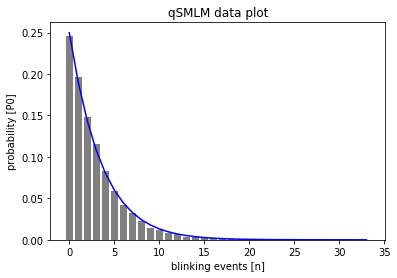

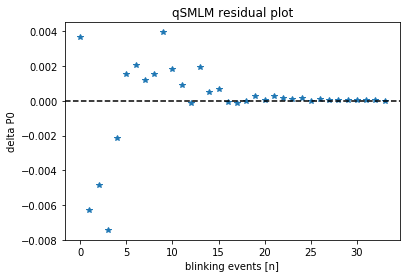

In [4]:
display(widgets.analysisButton)
def runAnalysis(event):
    widgets.clearOutput()
    display(widgets.analysisButton)
    if widgets.fileName:
        modeller.runAnalysis(n=widgets.nText.value,
                             p0=widgets.p0Text.value,
                             m = widgets.mText.value,
                             p = widgets.pText.value,
                             initD=widgets.initDText.value,
                             fileName = widgets.fileName)

widgets.analysisButton.on_click(runAnalysis)

### Save Model
Save results of modelig routine

In [5]:
display(widgets.saveButton)
def saveAnalysis(event):
    widgets.clearOutput()
    display(widgets.saveButton)
    if widgets.fileName:
        modeller.saveResults()

widgets.saveButton.on_click(saveAnalysis)

Button(description='save results', icon='check', style=ButtonStyle(), tooltip='Click me')

### Quote
"According to our definition, blinkling is the reappearance of fluorescence.", Franziska Fricke